<a href="https://colab.research.google.com/github/Xin-overclocked/pns/blob/main/huisan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Section 1: Define Your Research Question and Dataset**


*   Clearly state your research question
*   Briefly describe your dataset, including its source, the main variables, sample size, and any limitations.

**Research Questions**


1.   How does the age of athletes influence their likelihood of winning a medal in the Olympics across various sports?
2.   To what extent does an athlete's weight impact their chances of securing a medal in the Olympics, considering different sports categories?

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/athlete_events.csv')

In [ ]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
# Select only the 'Age', 'Weight', and 'Medal' columns
df = df[['Sport', 'Age', 'Weight', 'Medal']]

# Handle missing values
df.dropna(subset=['Sport', 'Age', 'Weight', 'Medal'], inplace=True)

**Source:**

The dataset is sourced from Kaggle and it contains information on Olympic athletes.  The specific file used is 'athlete_events.csv'.

**Main Variables:**

The dataset includes key variables such as athlete information (ID, name, sex, age, height, weight), game details (year, season, city), sport and event information, and medal outcomes (gold, silver, bronze).

**Limitations:**

* Missing Data:  The presence of missing values (NaNs) in columns like 'Age', 'Height', and 'Weight' may introduce bias or necessitate imputation.

* Data Accuracy:  Data accuracy from historical sources may vary.

* Representativeness: The dataset may not accurately represent all athletes who have ever participated in the Olympics throughout history.

* Scope: Limited to recorded data points in the dataset and may not cover all aspects of an athlete's performance or contextual factors.


In [ ]:
print(f"Sample Size: {df.shape[0]}")

Sample Size: 30425


In [ ]:
df

,Sport,Age,Weight,Medal
40,Ice Hockey,28.0,85.0,Bronze
41,Gymnastics,28.0,64.0,Bronze
42,Gymnastics,28.0,64.0,Gold
44,Gymnastics,28.0,64.0,Gold
48,Gymnastics,28.0,64.0,Gold
...,...,...,...,...
271078,Athletics,25.0,80.0,Silver
271080,Athletics,33.0,80.0,Bronze
271082,Fencing,28.0,82.0,Bronze
271102,Athletics,19.0,64.0,Bronze


# **Section 2: Summarize Key Data with Descriptive Statistics**



* Present summary statistics (mean, median, variance, etc.) visually using bar charts, pie charts, or histograms.
* Highlight any interesting patterns or trends you observe in the data.



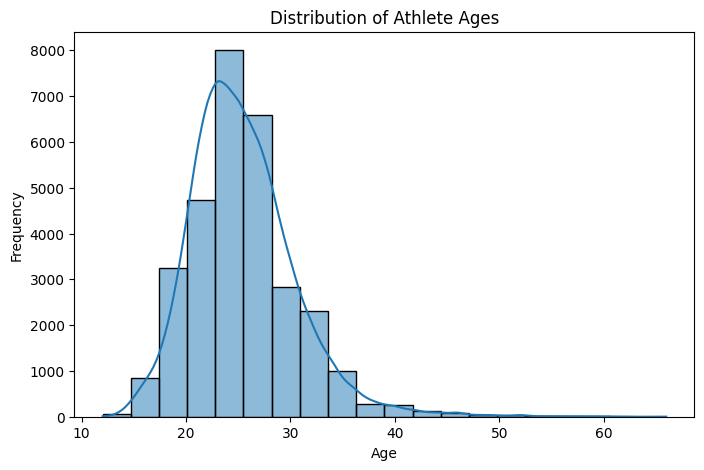

In [ ]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

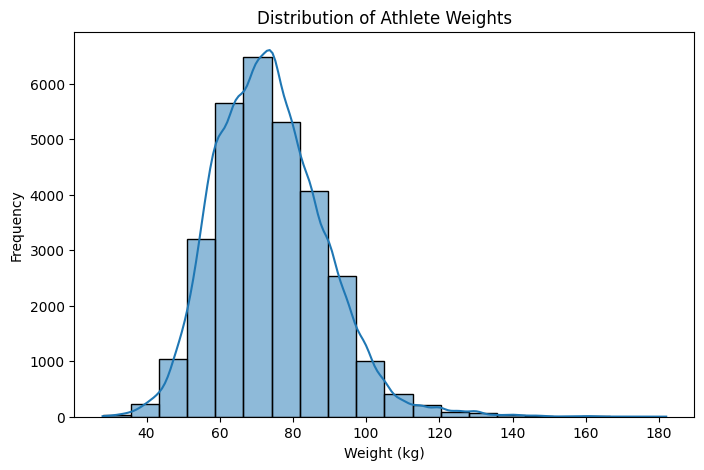

In [ ]:
# 2. Weight Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

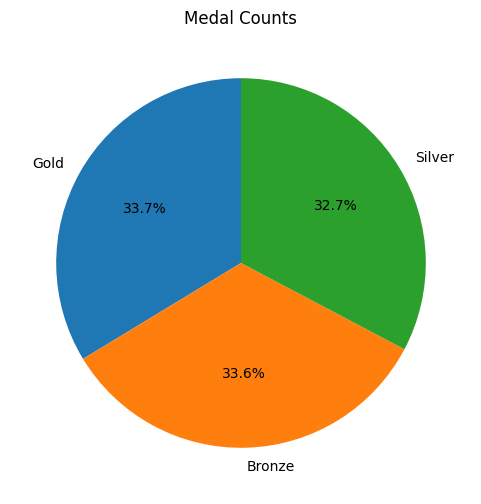

In [ ]:
# 3. Medal Proportion
medal_counts = df['Medal'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Medal Counts')
plt.show()

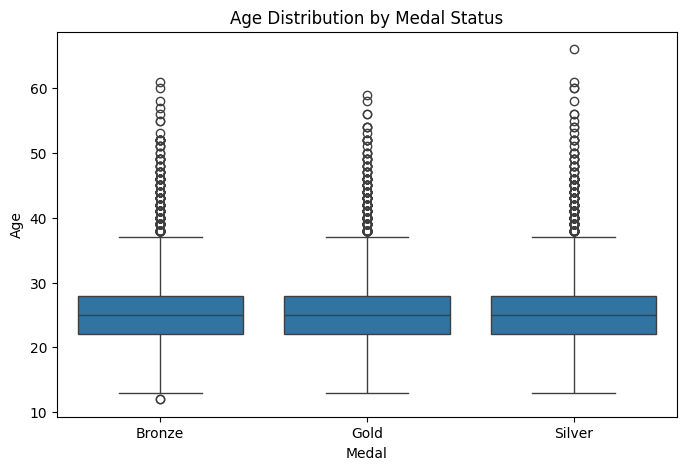

In [ ]:
# 4. Age vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Age', data=df)
plt.title('Age Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Age')
plt.show()

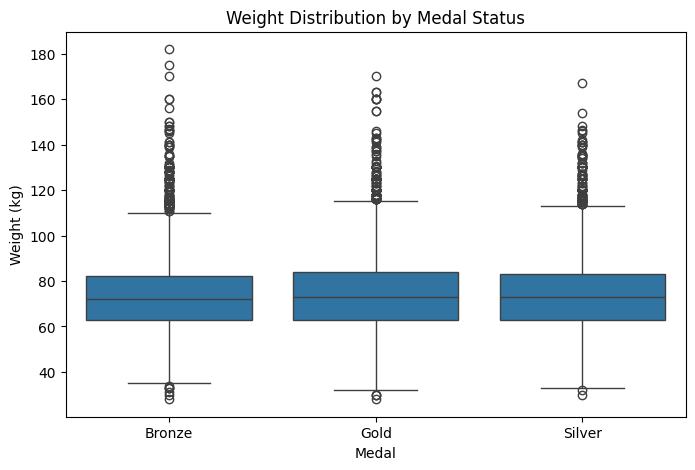

In [ ]:
# 5. Weight vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Weight', data=df)
plt.title('Weight Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Weight (kg)')
plt.show()

# **Section 3: Conduct a Probability Analysis**



# **Section 4: Perform Hypothesis Testing**

* State and test a hypothesis related to your research question
* Show your results visually (e.g., p-values, confidence intervals) and briefly summarize your findings.